In [21]:
# Imports
from os.path import join
from os import makedirs
import numpy as np
rng_seed = 399
np.random.seed(rng_seed)
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram

In [82]:
# Constants
output_dir = "output_plots"
makedirs(output_dir, exist_ok=True)
save_plots_to_file = True

## Plotting common activation functions

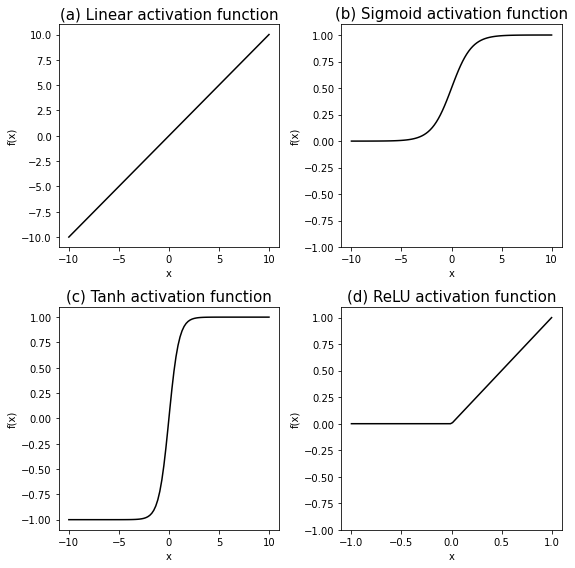

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
plot_params = {"c": "k"}
title_params = {"fontdict": {"fontsize": 15}}

# Linear activation function
xs = np.linspace(-10, 10, 100)
ax1.plot(xs, xs, **plot_params)
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("(a) Linear activation function", **title_params)

# Sigmoid activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))
ax2.set_ylim(-1, 1.1)
ax2.plot(xs, sigmoid(xs), **plot_params)
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_title("(b) Sigmoid activation function", **title_params)

# Tanh activation function
tanh = lambda x: (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
ax3.plot(xs, tanh(xs), **plot_params)
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_title("(c) Tanh activation function", **title_params)

# ReLU activation function
xs = np.linspace(-1, 1, 100)
relu = lambda x: np.maximum(x, 0)
ax4.set_ylim(-1, 1.1)
ax4.plot(xs, relu(xs), **plot_params)
ax4.set_xlabel("x")
ax4.set_ylabel("f(x)")
ax4.set_title("(d) ReLU activation function", **title_params)

# Plot/save
plt.tight_layout()
if save_plots_to_file:
    plt.savefig(join(output_dir, "common-activation-functions.pdf"), backend="pgf")
else:
    plt.show()

## Curse of dimensionality

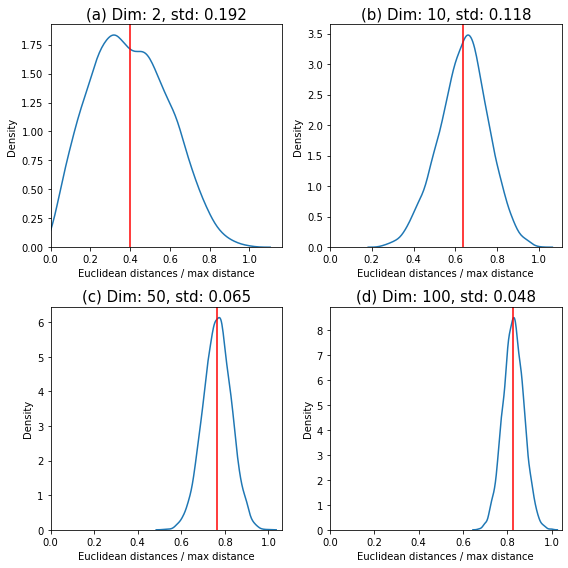

In [14]:
num_points = 100
cod_dims = [2, 10, 50, 100]
cod_dims_chars = "abcd"
n_cols = 2
n_rows = 2
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4 * n_cols, 4 * n_rows),
)
title_params = {"fontdict": {"fontsize": 15}}
for dims, dim_char, ax in zip(cod_dims, cod_dims_chars, axes.ravel()):
    
    # Generate points
    points = np.zeros((num_points, dims))
    for dim in range(dims):
        points[:, dim] = np.random.uniform(low=0, high=100, size=num_points)
    
    # Compute pairwise distances
    points_pairwise_dists = pdist(points)
    points_pairwise_dists_norm = points_pairwise_dists / points_pairwise_dists.max()
    points_pairwise_dists_norm_mean = np.mean(points_pairwise_dists_norm)

    sns.kdeplot(points_pairwise_dists_norm, ax=ax)
    
    #ax.plot(np.histogram(points_pairwise_dists_norm, bins="auto")[0])
    ax.axvline(points_pairwise_dists_norm_mean, ymin=0, ymax=np.max(points_pairwise_dists_norm), c="r")
    ax.set_title(
        f"({dim_char}) Dim: {dims}, std: {np.std(points_pairwise_dists_norm):0.3f}",
        **title_params
    )
    ax.set_xlabel("Euclidean distances / max distance")
    ax.set_ylabel("Density")
    ax.set_xlim(left=0)
    #ax.legend([f"Mean of points={points_pairwise_dists_norm_mean:0.3f}", "100 uniformly distributed points"])

# Plot/save
plt.tight_layout()
if save_plots_to_file:
    plt.savefig(join(output_dir, "curse-of-dimensionality.pdf"), backend="pgf")
else:
    plt.show()

## Dendrogram example

In [42]:
# Load data
iris_data = load_iris()
iris_data_X = iris_data["data"]
iris_data_y = iris_data["target"]

In [79]:
# Subsample Iris data to 10 data points per category
iris_data_point_per_cat = 10
iris_data_point_categories = len(np.unique(iris_data_y))
iris_data_X_sub = np.zeros(
    (iris_data_point_per_cat * iris_data_point_categories, iris_data_X.shape[1])
)
iris_data_y_sub = np.zeros(iris_data_point_per_cat * iris_data_point_categories, dtype=int)
for label_i in range(3):
    iris_data_point_indices = np.where(iris_data_y == label_i)[0][:iris_data_point_per_cat]
    iris_data_X_sub[iris_data_point_per_cat * label_i: iris_data_point_per_cat * (label_i + 1)] = iris_data_X[iris_data_point_indices]
    iris_data_y_sub[iris_data_point_per_cat * label_i: iris_data_point_per_cat * (label_i + 1)] = iris_data_y[iris_data_point_indices]

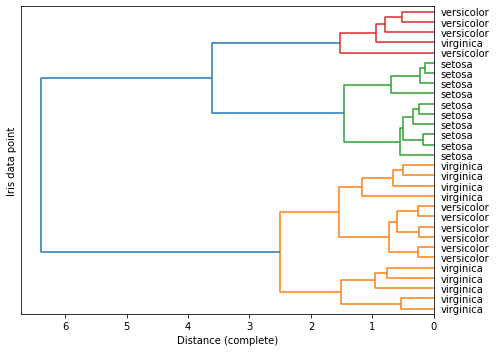

In [83]:
# Compute ward linkage on Iris data
iris_data_linkage = linkage(iris_data_X_sub, method="complete")
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel("Distance (complete)")
ax.set_ylabel("Iris data point")
dendrogram(
    Z=iris_data_linkage,
    labels=[iris_data["target_names"][y] for y in iris_data_y_sub],
    color_threshold=3,
    orientation="left",
    ax=ax
)

# Plot/save
plt.tight_layout()
if save_plots_to_file:
    plt.savefig(join(output_dir, "dendrogram-example.pdf"), backend="pgf")
else:
    plt.show()